In [1132]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,accuracy_score

In [1133]:
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [1135]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [1136]:
df.drop_duplicates(inplace=True)

In [1137]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [1138]:
df.dropna(axis=1,inplace=True)

In [1139]:
df.tail()  ## O index precisa ser resetado

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
885,0,3,female,0,5,29.125,Third,woman,False,no,False
887,1,1,female,0,0,30.000,First,woman,False,yes,True
888,0,3,female,1,2,23.450,Third,woman,False,no,False
889,1,1,male,0,0,30.000,First,man,True,yes,True
890,0,3,male,0,0,7.750,Third,man,True,no,True


In [1140]:
 df.reset_index(drop=True,inplace=True)

In [1141]:
df.tail()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
779,0,3,female,0,5,29.125,Third,woman,False,no,False
780,1,1,female,0,0,30.000,First,woman,False,yes,True
781,0,3,female,1,2,23.450,Third,woman,False,no,False
782,1,1,male,0,0,30.000,First,man,True,yes,True
783,0,3,male,0,0,7.750,Third,man,True,no,True


## _Analisando colunas redundantes_

In [1142]:
df.survived.value_counts()

0    461
1    323
Name: survived, dtype: int64

In [1143]:
df.alive.value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [1144]:
df.drop(columns='alive',inplace=True)

In [1145]:
df.sex = df.sex.map({'male':1,'female':0})

In [1146]:
df.who.value_counts()

man      451
woman    251
child     82
Name: who, dtype: int64

In [1147]:
df.head(2)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,1,1,0,7.2500,Third,man,True,False
1,1,1,0,1,0,71.2833,First,woman,False,False


In [1148]:
df = pd.get_dummies(columns=['class','who'],data=df)

df[['adult_male','alone']] = df[['adult_male','alone']].astype(int)

In [1149]:
df

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,3,1,1,0,7.2500,1,0,0,0,1,0,1,0
1,1,1,0,1,0,71.2833,0,0,1,0,0,0,0,1
2,1,3,0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,1,0,1,0,53.1000,0,0,1,0,0,0,0,1
4,0,3,1,0,0,8.0500,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,0,0,5,29.1250,0,0,0,0,1,0,0,1
780,1,1,0,0,0,30.0000,0,1,1,0,0,0,0,1
781,0,3,0,1,2,23.4500,0,0,0,0,1,0,0,1
782,1,1,1,0,0,30.0000,1,1,1,0,0,0,1,0


### _Separando dados de treino e teste_

In [1150]:
from sklearn.model_selection import train_test_split

In [1151]:
X = df.iloc[:,1:]

y = df['survived']

In [1152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,stratify=y)

In [1153]:
X_train

,pclass,sex,sibsp,parch,fare,adult_male,alone,class_First,class_Second,class_Third,who_child,who_man,who_woman
197,1,1,0,0,31.0000,1,1,1,0,0,0,1,0
427,2,0,1,2,27.7500,0,0,0,1,0,0,0,1
765,1,1,0,0,50.4958,1,1,1,0,0,0,1,0
381,2,0,1,1,32.5000,0,0,0,1,0,0,0,1
509,2,1,0,0,10.5000,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1,0,0,8.0500,1,1,0,0,1,0,1,0
709,3,1,0,1,8.5167,0,0,0,0,1,1,0,0
458,3,1,0,0,7.7500,1,1,0,0,1,0,1,0
254,1,1,0,0,31.0000,1,1,1,0,0,0,1,0


In [1154]:
y_train

197    1
427    1
765    0
381    1
509    1
      ..
106    0
709    1
458    1
254    0
634    1
Name: survived, Length: 548, dtype: int64

## _Inicializando a classificação_

In [1155]:
y_train.value_counts()  ## 1 = sobreviveu que a seunda posição na imagem da árvore [ 322,226 ] ( é o sim )

0    322
1    226
Name: survived, dtype: int64

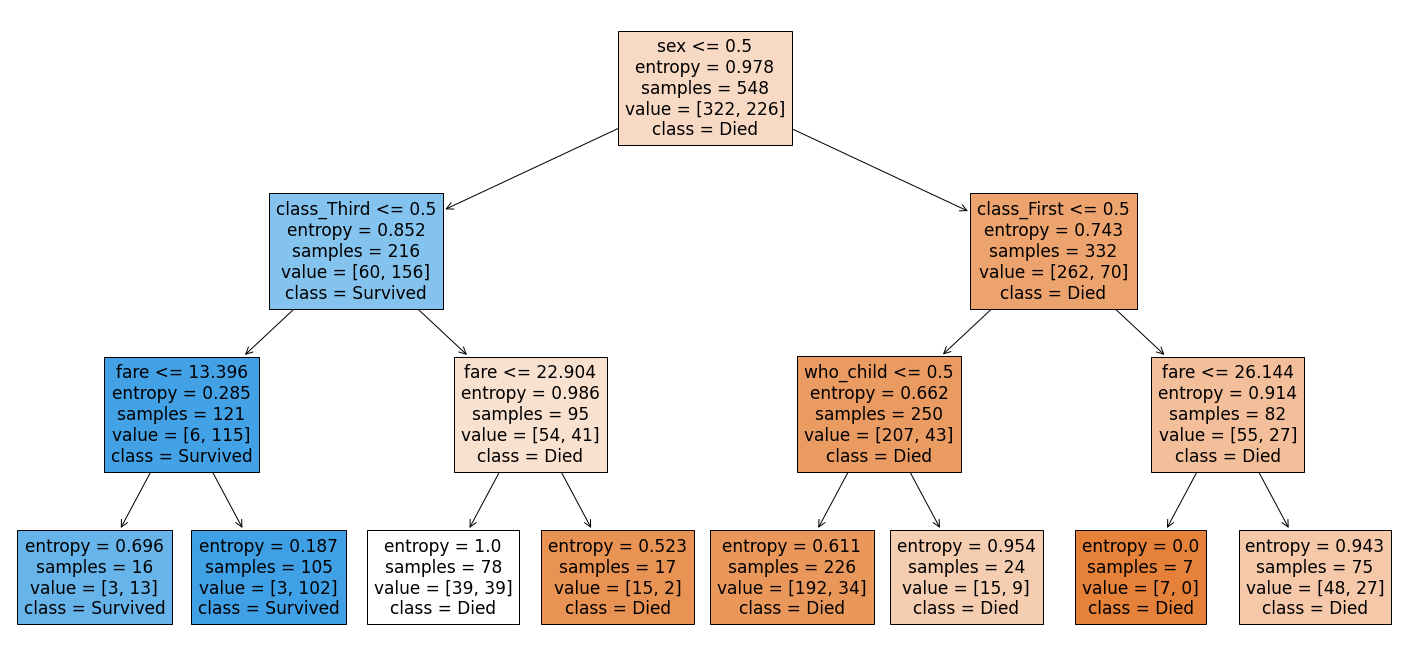

In [1156]:
clf = DecisionTreeClassifier(max_depth=3,random_state=100,criterion='entropy').fit(X_train,y_train)

plt.figure(figsize=(25,12))

plot_tree(clf,filled=True,class_names=['Died','Survived'],feature_names=X_train.columns);

## _Verificando overfiting_

In [1157]:
predict = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


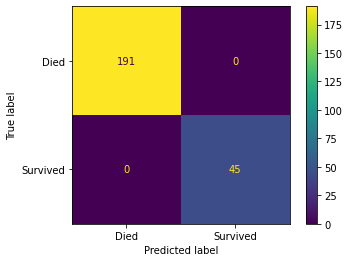

In [1158]:
plot_confusion_matrix(clf,X_test,predict,display_labels=['Died','Survived']);

In [1159]:
accuracy_score(y_test,predict)

0.7542372881355932

## _Aplicando grid search_ 

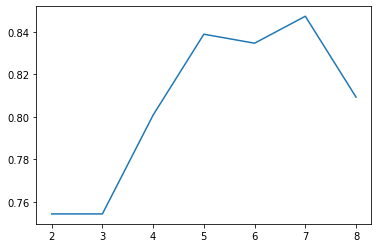

In [1160]:
depths = []
scores = []

for i in range (2,9):
  clf = DecisionTreeClassifier(max_depth=i,random_state=100,criterion='entropy').fit(X_train,y_train)
  depths.append(i)
  predict = clf.predict(X_test)
  scores.append(accuracy_score(y_test,predict))

plt.plot(depths,scores)

In [1161]:
scores = pd.DataFrame({'profundidade': depths, 'score_test':scores})

depth_score = scores.loc[scores.score_test==scores['score_test'].max()].iloc[0]

In [1162]:
depth_score

profundidade    7.000000
score_test      0.847458
Name: 5, dtype: float64

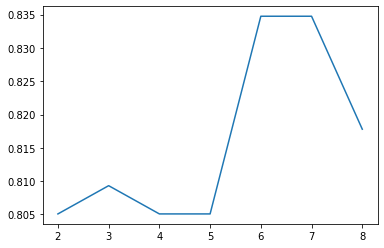

In [1163]:
samples_leaf = []
scores = []

for i in range (2,9):
  clf = DecisionTreeClassifier(min_samples_leaf = i,max_depth=depth_score.values[0],random_state=100,criterion='entropy').fit(X_train,y_train)
  samples_leaf.append(i)
  predict = clf.predict(X_test)
  scores.append(accuracy_score(y_test,predict))

plt.plot(samples_leaf,scores)

In [1164]:
scores = pd.DataFrame({'samples_leaf': depths, 'score_test':scores})

leaf_score = scores.loc[scores.score_test==scores['score_test'].max()].iloc[0]

In [1165]:
leaf_score

samples_leaf    6.000000
score_test      0.834746
Name: 4, dtype: float64

## _Utilizando ccp_alphas_

In [1166]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train) ## pacote de alphas.
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [1167]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

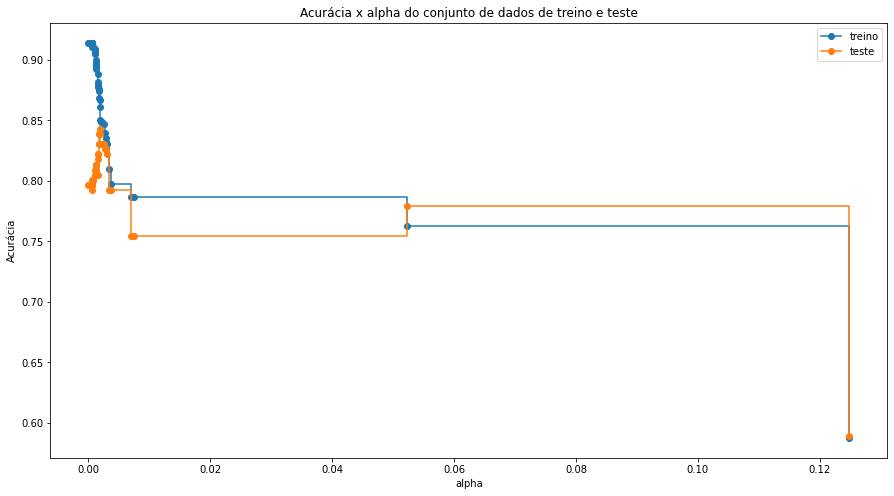

In [1168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1169]:
scores = pd.DataFrame({'alphas': ccp_alphas.tolist(), 'score_test': test_scores})

In [1170]:
alphas_score = scores.loc[scores.score_test==scores['score_test'].max()].iloc[0]

In [1171]:
int(leaf_score.values[0])

6

In [1172]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=100,ccp_alpha=alphas_score.values[0],min_samples_leaf=int(leaf_score.values[0])-1,max_depth=depth_score.values[0]-1)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8389830508474576

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


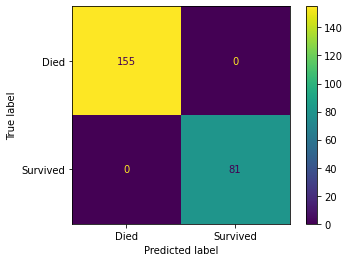

In [1173]:
predict = clf.predict(X_test)

plot_confusion_matrix(clf,X_test,predict,display_labels=['Died','Survived']);

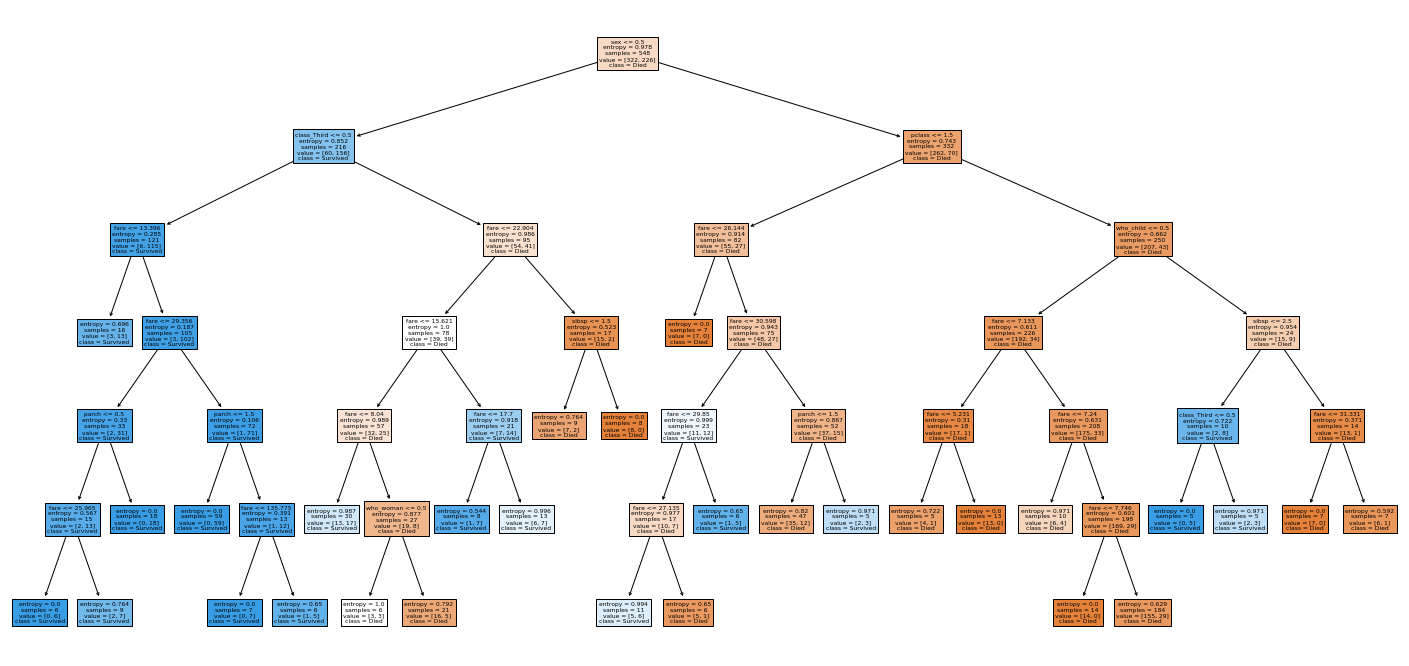

In [1174]:
plt.figure(figsize=(25,12))

plot_tree(clf,filled=True,class_names=['Died','Survived'],feature_names=X_train.columns);